In [1]:
import sys
import cv2
import matplotlib.pyplot as plt
sys.path.insert(1, './../')

import pykinect_azure as pykinect
import numpy as np
import image_plot_utilities as ipu 

from pykinect_azure.k4a import _k4a
from pykinect_azure.k4a.capture import Capture
from pykinect_azure.k4a.transformation import Transformation
import scipy.io

In [2]:
import json
import time
import pickle
#import kinectpy as kpy
#from kinectpy.k4a._k4atypes import K4A_CALIBRATION_TYPE_DEPTH

In [3]:
device_config = pykinect.default_configuration
#print(device_config)
#playback_calibration1 = playback1.get_calibration()
#print(playback_config1)
#print(playback_calibration1)

In [4]:
if __name__ == "__main__":
    pykinect.initialize_libraries()
    
    mainpath="D:/Kinect Tools/Nahian/Code Backup Mar 29/All_code_f/Neo kinect calibration/New Calibration/"

    for i in range(1, 3):
    #for i in range(1, 8):
        #video1_filename = "D:/SCULPT/Nahian/Video collected/check_mas"+str(i)+".mkv"
        #video1_filename = "D:/SCULPT/Nahian/video feb 14/mas"+str(i)+"unb.mkv"
        video1_filename=r"D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\New calibration data\cam2con"+str(i)+".mkv"
        print(video1_filename)
    

        playback1 = pykinect.start_playback(video1_filename)
        for j in range(10):
            playback1.update()

       
        
        
        capture1=playback1.update()


        playback_calibration1 = playback1.get_calibration()
        playback_config1 = playback1.get_record_configuration()


        print(capture1)
        a=Capture.get_color_image(capture1)
        print(a[0])
        b=Capture.get_depth_image(capture1)

        c=Capture.get_transformed_depth_image(capture1)

        _, d=capture1.get_ir_image()
        
        #filename=r"D:\SCULPT\Nahian\Video collected\check_images\rgb\mas"+str(i)+".jpg"
        filename=r"D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\images\rgb\cam2image"+str(i)+".jpg"
        cv2.imwrite(filename, a[1])

        #filename=r"D:\SCULPT\Nahian\Video collected\check_images\depth\mas"+str(i)+".jpg"
        filename=r"D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\images\depth\cam2image"+str(i)+".mat"
        scipy.io.savemat(filename, mdict={'name':b[1]})

        #filename=r"D:\SCULPT\Nahian\Video collected\check_images\modified depth\mas"+str(i)+".jpg"
        filename=r"D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\images\modified depth\cam2image"+str(i)+".mat"
        #cv2.imwrite(filename, c[1])
        scipy.io.savemat(filename, mdict={'name':c[1]})


        filename=r"D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\images\ir images\cam2image"+str(i)+".mat"
        #cv2.imwrite(filename, c[1])
        scipy.io.savemat(filename, mdict={'name':d})
        playback1.close()

    
        
        
   

D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\New calibration data\cam2con1.mkv
True
D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\New calibration data\cam2con2.mkv
True


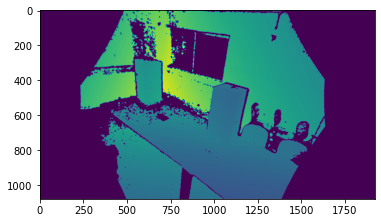

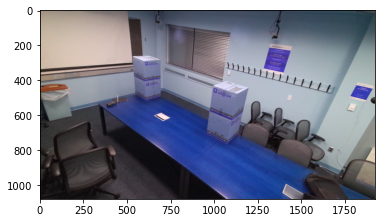

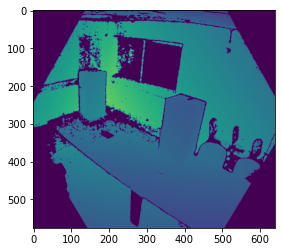

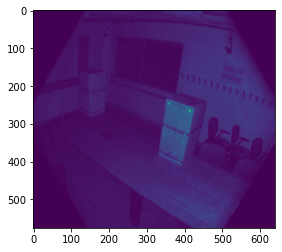

In [5]:
import matplotlib.pyplot as plt
plt.imshow(c[1])
plt.figure()
plt.imshow(a[1])
plt.figure()
plt.imshow(b[1])
plt.figure()
plt.imshow(d)

In [6]:
pykinect.initialize_libraries()


In [7]:
### PIXEL TO MM IN KINECT CO-ORDINATES


from pykinect_azure.k4a import _k4atypes

In [8]:
bs=[]
with open(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\text files 5 variable\cam2con1.txt') as f:
    for line in f:
        a=line.strip().split(',')
        #print(a)
        b=[int(x) for x in a]
        bs.append(b)
        

f.close()
num=len(bs)
print(num)
#print(bs)
with open(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\text files 5 variable\cam2con2.txt') as f:
    for line in f:
        a=line.strip().split(',')
        b=[int(x) for x in a]
        bs.append(b)
    
    #print(bs)
f.close()
bs=np.array(bs)
print(bs.shape)



23
(38, 5)


(38, 3)
(38, 2)


Text(0.5, 0, 'Z Label')

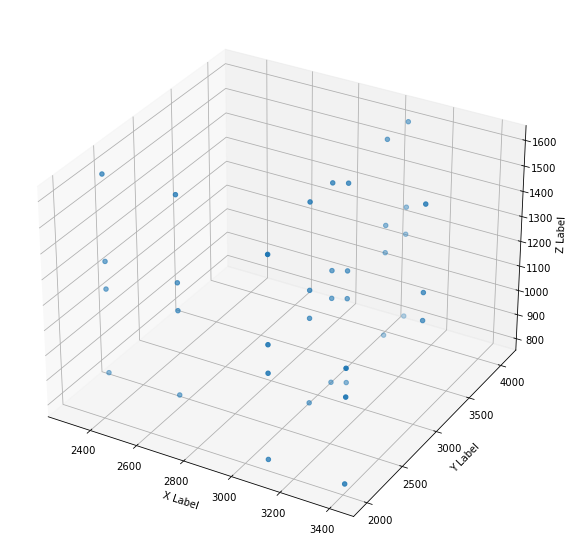

In [9]:
XYZ=bs[:,2:5]
uv=bs[:,0:2]

print(XYZ.shape)
print(uv.shape)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(XYZ[:,0],XYZ[:,2],XYZ[:,1],marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

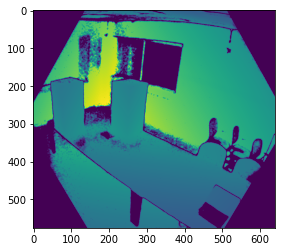

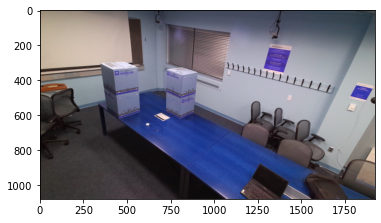

In [10]:
#this one for kinect pixel to kinect world

video1_filename4= r"D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\New calibration data/cam2con1.mkv"
playback2 = pykinect.start_playback(video1_filename4)

for i in range(10):
	playback2.update()


playback_config = playback2.get_record_configuration()
#print(playback_config)

depth_images=[]

for i in range(5):
	capture1 = playback2.update()
	cal_handle= playback2.get_calibration()
	
	ret, depth_im = capture1.get_depth_image()
	depth_images.append(depth_im)

depth_images=np.array(depth_images)
depth_image=depth_images.mean(axis=0)
depth_image.shape 

plt.imshow(depth_image)



		# Get the color image from the capture
ret, color_image = capture1.get_color_image()





		# Get the colored depth

ret,ir_image=capture1.get_ir_image()

		# Combine both images
#combined_image = cv2.addWeighted(color_image[:,:,:3], 0.7, depth_image, 0.3, 0)
	
		# Overlay body segmentation on depth image
plt.figure()
plt.imshow(color_image)
playback2.close()






In [11]:



#Change the two lines below
uvcon1=uv[0:num,:]




x_all=[]
y_all=[]
z_all=[]
filename=r"D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\3D kinect data\kinect_cam2_con1.mat"


for i in range(len(uvcon1)):

    ux=uvcon1[i][0] #column of image pixel
    vy=uvcon1[i][1] #row of image pixel
    z=depth_image[vy,ux]
    xy = _k4atypes.k4a_float2_t((ux, vy))

    out = cal_handle.convert_2d_to_3d(xy, z, 0,0)
    x_all.append(out.xyz.x)
    y_all.append(out.xyz.y)
    z_all.append(out.xyz.z)


x_all=np.array(x_all).reshape(len(uvcon1),1)
y_all=np.array(y_all).reshape(len(uvcon1),1)
z_all=np.array(z_all).reshape(len(uvcon1),1)
print(x_all[0])

print(y_all[0])
print(z_all[0])
xyz=np.concatenate([x_all,y_all,z_all],axis=1)


        #cv2.imwrite(filename, c[1])
scipy.io.savemat(filename, mdict={'name':xyz})
#scipy.io.savemat('kinect_cam2_con1.mat', mdict={'name':xyz})

print(xyz.shape)






[-1491.17919922]
[-75.61238861]
[3007.60009766]
(23, 3)


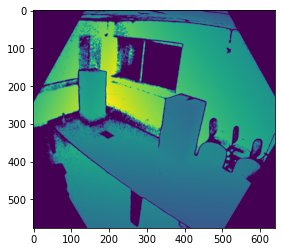

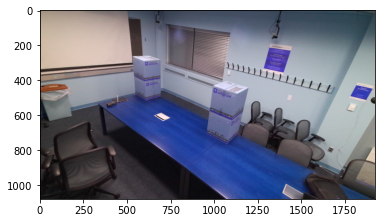

In [12]:
#this one


video1_filename4= r"D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\New calibration data/cam2con2.mkv"
playback2 = pykinect.start_playback(video1_filename4)

for i in range(10):
	playback2.update()
#playback2.update()

playback_config = playback2.get_record_configuration()
#print(playback_config)

depth_images=[]

for i in range(5):
	capture1 = playback2.update()
	cal_handle= playback2.get_calibration()
	
	ret, depth_im = capture1.get_depth_image()
	depth_images.append(depth_im)

depth_images=np.array(depth_images)
depth_image=depth_images.mean(axis=0)
depth_image.shape 

plt.imshow(depth_image)



		# Get the color image from the capture
ret, color_image = capture1.get_color_image()





		# Get the colored depth

ret,ir_image=capture1.get_ir_image()

		# Combine both images
#combined_image = cv2.addWeighted(color_image[:,:,:3], 0.7, depth_image, 0.3, 0)
	
		# Overlay body segmentation on depth image
plt.figure()
plt.imshow(color_image)
playback2.close()






In [13]:
#FOR CONFIG 2

uvcon2=uv[num:,:]
print(uvcon1.shape)
print(uvcon2.shape)

x_all=[]
y_all=[]
z_all=[]

filename=r"D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\3D kinect data\kinect_cam2_con2.mat"


for i in range(len(uvcon2)):

    ux=uvcon2[i][0]
    vy=uvcon2[i][1]
    z=depth_image[vy,ux]
    xy = _k4atypes.k4a_float2_t((ux, vy))

    out = cal_handle.convert_2d_to_3d(xy, z, 0,0)
    x_all.append(out.xyz.x)
    y_all.append(out.xyz.y)
    z_all.append(out.xyz.z)


x_all=np.array(x_all).reshape(len(uvcon2),1)
y_all=np.array(y_all).reshape(len(uvcon2),1)
z_all=np.array(z_all).reshape(len(uvcon2),1)
print(x_all[0])

print(y_all[0])
print(z_all[0])
xyz=np.concatenate([x_all,y_all,z_all],axis=1)


        #cv2.imwrite(filename, c[1])
scipy.io.savemat(filename, mdict={'name':xyz})
#scipy.io.savemat('kinect_cam2_con2.mat', mdict={'name':xyz})


print(xyz.shape)

(23, 2)
(15, 2)
[-1313.23254395]
[-498.74871826]
[3777.19995117]
(15, 3)


In [14]:
filename1=r"D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\3D kinect data\cam2worldcon1.mat"
filename2=r"D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\3D kinect data\cam2worldcon2.mat"

a=XYZ[:num,:]
b=XYZ[num:,:]

scipy.io.savemat(filename1, mdict={'name':a})
scipy.io.savemat(filename2, mdict={'name':b})

scipy.io.savemat('cam2con1.mat', mdict={'name':a})
scipy.io.savemat('cam2con2.mat', mdict={'name':b})




print(a.shape)
print(b.shape)

(23, 3)
(15, 3)
